In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Polygon

In [101]:
dat_folder = 'data/logs/multiple/'
files = ['edge-cloud_latency.log','edge-cloud_bytes.log','edge-cloud_latency_1_run.log','edge-cloud_bytes_1_run.log']
header = ['time', 'latency', 'size']
column_names = ["Time","Latency (ms)","Size (MB)"]
data = {}
dfs_dict = {}
n_pipelines = 3

for file in files:
    i = 0
    time = 1
    pipelines = [[(0,0,0)] for _ in range(0,n_pipelines)]
    zone = [[(0, "cloud")] for _ in range(0,n_pipelines)]
    data[file[:-4]] = []
    with open(dat_folder + file, "r") as to_read:
        for l in to_read.readlines():
            if 'Time' in l: pass
            elif '------' in l:
                data[file[:-4]].append(pipelines)
                i = i + 1
                pipelines = [[(0,0,0)] for _ in range(0,n_pipelines)]
                time = 1
            else:
                pipeline_data = list(map(lambda y : y[1][:-1] ,map(lambda x: x.split("("), l.split())))
                for i in range(0, n_pipelines): 
                    x = pipeline_data[i].split(",")
                    lat, by = float(x[0]), float(x[1]) / 10**6
                    pipelines[i].append((time,lat,by))
                time = time + 1
                
for scenario in map(lambda s: s[:-4], files):
    dfs_pipeline_list = []
    for run in data[scenario]:
        dfs_pipelines = [pd.DataFrame(run[i], columns=column_names) for i in range(0, n_pipelines)]
        if len(dfs_pipeline_list) < 20: dfs_pipeline_list.append(dfs_pipelines)
    dfs_dict[scenario] = dfs_pipeline_list

In [102]:
dfs = {}
for s in map(lambda s: s[:-4], files):
    pipelines = [[] for _ in range(0,n_pipelines)]
    for run in dfs_dict[s]:
        for i in range(0, n_pipelines):
            pipelines[i].append(run[i])
    if len(pipelines[0]) > 1: 
        dfs_groupby = [pd.concat(pipelines[i]).groupby('Time') for i in range(0,n_pipelines)]
        dfs[s] = [(dfs_groupby[i].mean(), dfs_groupby[i].std(), dfs_groupby[i].median(), dfs_groupby[i].max(), dfs_groupby[i].min()) for i in range(0,n_pipelines)]

In [103]:
LANG="en_US.UTF-8"
LANGUAGE="en_US.UTF-8"
LC_ALL="en_US.UTF-8"

sns.set(font='Jetbrains Mono') # Set font

facecolor_cloud = [204/255, 121/255, 167/255, .85]

facecolor_edge_cloud = [213/255, 94/255, 0., .85]


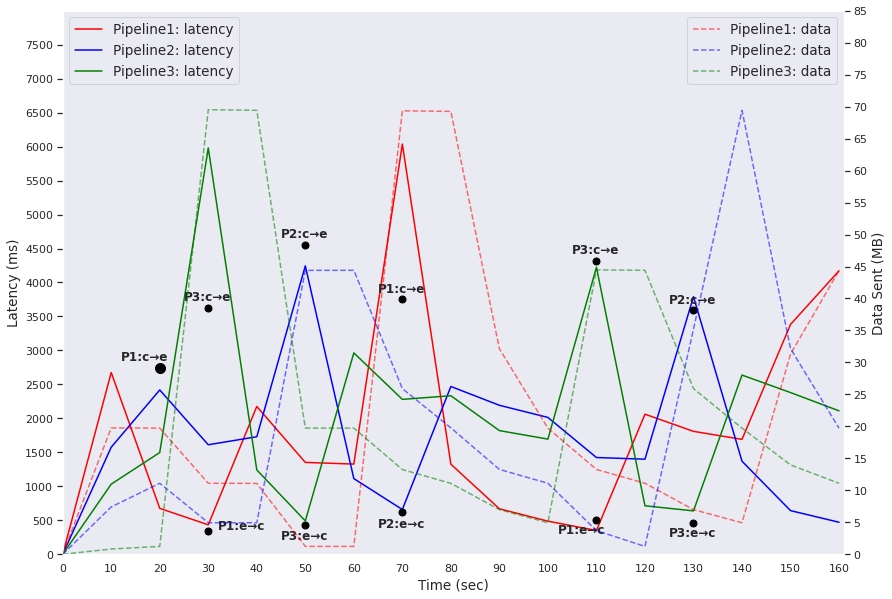

In [104]:
x = dfs_dict['edge-cloud_bytes_1_run'][0][0].reset_index()['Time']
p1_byte = dfs_dict['edge-cloud_bytes_1_run'][0][0].reset_index()['Size (MB)']
p2_byte = dfs_dict['edge-cloud_bytes_1_run'][0][1].reset_index()['Size (MB)']
p3_byte = dfs_dict['edge-cloud_bytes_1_run'][0][2].reset_index()['Size (MB)']
p1_lat = dfs_dict['edge-cloud_bytes_1_run'][0][0].reset_index()['Latency (ms)']
p2_lat = dfs_dict['edge-cloud_bytes_1_run'][0][1].reset_index()['Latency (ms)']
p3_lat = dfs_dict['edge-cloud_bytes_1_run'][0][2].reset_index()['Latency (ms)']


fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)
ax_background = ax.twinx()
ax.grid(False)
ax_background.grid(False)

# define background plot for bytes
b1 = ax_background.plot(
    x,
    p1_byte, 
    linestyle='dashed', 
    label='Pipeline1: data', 
    color='red', 
    zorder=100, 
    alpha=.55
)

b2 = ax_background.plot(
    x,
    p2_byte, 
    linestyle='dashed', 
    label='Pipeline2: data', 
    color='blue', 
    zorder=100, 
    alpha=.55
)

b3 = ax_background.plot(
    x,
    p3_byte, 
    linestyle='dashed', 
    label='Pipeline3: data', 
    color='green', 
    zorder=100, 
    alpha=.55
)


#####latency#####

l1 = ax.plot(
    x,
    p1_lat, 
    linestyle='solid', 
    label='Pipeline1: latency', 
    color='red', 
    zorder=10000, 
    alpha=1
)

l2 = ax.plot(
    x,
    p2_lat, 
    linestyle='solid', 
    label='Pipeline2: latency', 
    color='blue', 
    zorder=10000, 
    alpha=1
)

l3 = ax.plot(
    x,
    p3_lat, 
    linestyle='solid', 
    label='Pipeline3: latency', 
    color='green', 
    zorder=10000, 
    alpha=1
)


###swap points#####
ms = 7
ax.plot(2, 2742.6666666666665, linewidth=100, marker="o", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.text(1.2, 2850, "P1:c\u2192e", fontsize=12, fontweight='bold', zorder=100000)

ax.plot(3, 347, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.text(3.2, 360, "P1:e\u2192c", fontsize=12, fontweight='bold', zorder=100000)

ax.plot(3, 3620, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.text(2.5, 3730, "P3:c\u2192e", fontsize=12, fontweight='bold', zorder=100000)

ax.plot(5, 434.75, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.text(4.5, 220, "P3:e\u2192c", fontsize=12, fontweight='bold', zorder=100000)

ax.plot(5, 4556, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.text(4.5, 4656, "P2:c\u2192e", fontsize=12, fontweight='bold', zorder=100000)

ax.plot(7, 624.75, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.text(6.5, 400.75, "P2:e\u2192c", fontsize=12, fontweight='bold', zorder=100000)

ax.plot(7, 3751.5, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.text(6.5, 3851.5, "P1:c\u2192e", fontsize=12, fontweight='bold', zorder=100000)

ax.plot(11, 500, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.text(10.2, 300, "P1:e\u2192c", fontsize=12, fontweight='bold', zorder=100000)

ax.plot(11, 4322, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.text(10.5, 4422, "P3:c\u2192e", fontsize=12, fontweight='bold', zorder=100000)

ax.plot(13, 461.25, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.text(12.5, 261.25, "P3:e\u2192c", fontsize=12, fontweight='bold', zorder=100000)

ax.plot(13, 3591.5, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.text(12.5, 3691.5, "P2:c\u2192e", fontsize=12, fontweight='bold', zorder=100000)


# set ticks and labels
ax.set_xlabel('Time (sec)', fontsize=13.5)
ax.set_xticks(range(0, 17))
ax.set_xticklabels([x for x in range(0, 170, 10)])

# background ticks and labels
ax.set_yticks(range(0, 8000, 500))
ax_background.set_yticks(range(0, 90, 5))
ax.set_xlim(0, 16.1)
ax.set_ylim(-.0001, 8000)
ax_background.set_ylim(-.0001, 85)
ax.set_ylabel('Latency (ms)', fontsize=13.5)
ax_background.set_ylabel('Data Sent (MB)', fontsize=13.5)

# legend settings
ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

In [56]:
fig.savefig(f'images/policy_byte_based.pdf', dpi=100)

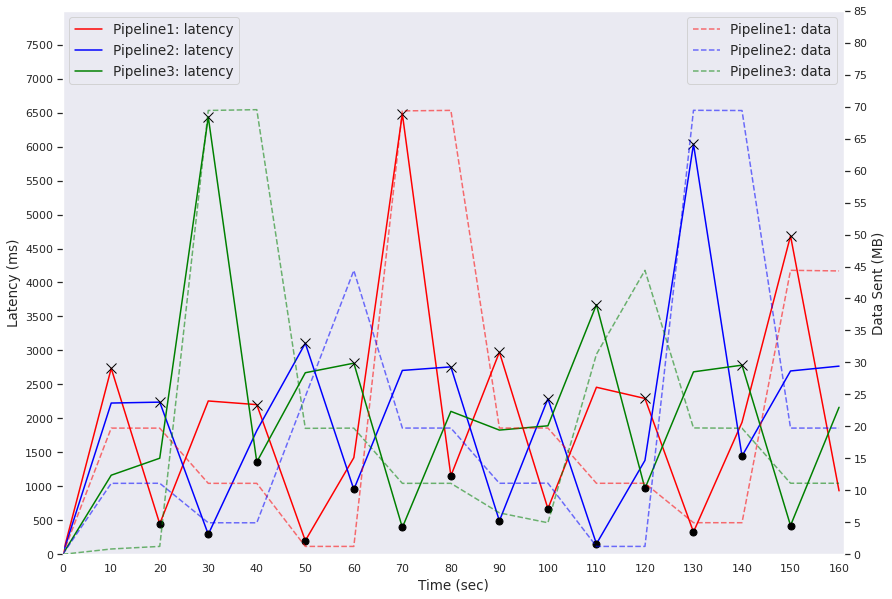

In [93]:
x = dfs_dict['edge-cloud_latency_1_run'][0][0].reset_index()['Time']
p1_byte = dfs_dict['edge-cloud_latency_1_run'][0][0].reset_index()['Size (MB)']
p2_byte = dfs_dict['edge-cloud_latency_1_run'][0][1].reset_index()['Size (MB)']
p3_byte = dfs_dict['edge-cloud_latency_1_run'][0][2].reset_index()['Size (MB)']
p1_lat = dfs_dict['edge-cloud_latency_1_run'][0][0].reset_index()['Latency (ms)']
p2_lat = dfs_dict['edge-cloud_latency_1_run'][0][1].reset_index()['Latency (ms)']
p3_lat = dfs_dict['edge-cloud_latency_1_run'][0][2].reset_index()['Latency (ms)']


fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)
ax_background = ax.twinx()
ax.grid(False)
ax_background.grid(False)

# define background plot for bytes
b1 = ax_background.plot(
    x,
    p1_byte, 
    linestyle='dashed', 
    label='Pipeline1: data', 
    color='red', 
    zorder=100, 
    alpha=.55
)

b2 = ax_background.plot(
    x,
    p2_byte, 
    linestyle='dashed', 
    label='Pipeline2: data', 
    color='blue', 
    zorder=100, 
    alpha=.55
)

b3 = ax_background.plot(
    x,
    p3_byte, 
    linestyle='dashed', 
    label='Pipeline3: data', 
    color='green', 
    zorder=100, 
    alpha=.55
)


#####latency#####

l1 = ax.plot(
    x,
    p1_lat, 
    linestyle='solid', 
    label='Pipeline1: latency', 
    color='red', 
    zorder=10000, 
    alpha=1
)

l2 = ax.plot(
    x,
    p2_lat, 
    linestyle='solid', 
    label='Pipeline2: latency', 
    color='blue', 
    zorder=10000, 
    alpha=1
)

l3 = ax.plot(
    x,
    p3_lat, 
    linestyle='solid', 
    label='Pipeline3: latency', 
    color='green', 
    zorder=10000, 
    alpha=1
)


###swap points#####

# x (cloud -> edge) o (edge -> cloud)

ms = 7
ax.plot(1, 2736, linewidth=100000, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(0.5, 2850, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(2, 448.5, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(1.6, 250, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(2, 2239, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(1.5, 2350, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(3, 293.5, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(2.5, 100, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(3, 6436.5, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(2.5, 6600, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(4, 1358, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(3.5, 1130, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(4, 2202, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(3.5, 2300, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(5, 200.5, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(4.5, 20, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(5, 3106, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(4.5, 3200, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(6, 954.5, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(5.5, 750, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(6, 2812.75, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(5.5, 2950, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(7, 394.5, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(6.5, 150, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(7, 6482, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(6.5, 6600, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(8, 1154, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(7.5, 900, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(8, 2758.25, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(7.5, 2850, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(9, 492, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(8.5, 300, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(9, 2975, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(8.5, 3100, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(10, 671.5, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(9.5, 450, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(10, 2290, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(9.5, 2400, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(11, 154, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(11.1, 130, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(11, 3674, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(10.5, 3800, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(12, 969, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(11.5, 800, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(12, 2293, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(11.5, 2400, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(13, 328, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(12.5, 150, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(13, 6035.5, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(12.5, 6150, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(14, 1445, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(13.5, 1200, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(14, 2783.6, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(13.5, 2900, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(15, 423.5, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(14.5, 200, "E\u2192C", fontsize=11, fontweight='bold', zorder=100000)

ax.plot(15, 4686, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
#ax.text(14.5, 4800, "C\u2192E", fontsize=11, fontweight='bold', zorder=100000)

# set ticks and labels
ax.set_xlabel('Time (sec)', fontsize=13.5)
ax.set_xticks(range(0, 17))
ax.set_xticklabels([x for x in range(0, 170, 10)])

# background ticks and labels
ax.set_yticks(range(0, 8000, 500))
ax_background.set_yticks(range(0, 90, 5))
ax.set_xlim(0, 16.1)
ax.set_ylim(-.0001, 8000)
ax_background.set_ylim(-.0001, 85)
ax.set_ylabel('Latency (ms)', fontsize=13.5)
ax_background.set_ylabel('Data Sent (MB)', fontsize=13.5)

# legend settings
ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

In [94]:
fig.savefig(f'images/policy_latency_based.pdf', dpi=100)

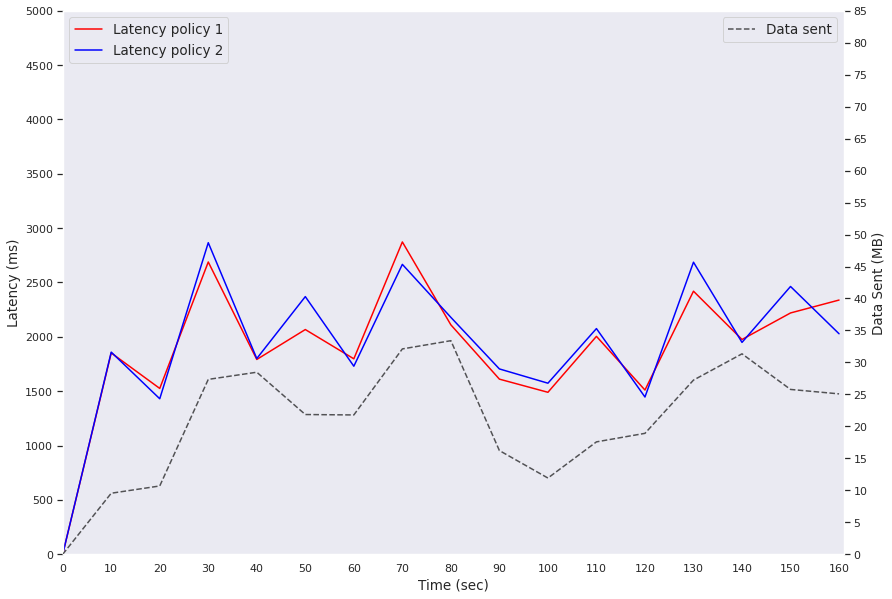

In [28]:
x = dfs['edge-cloud_latency'][0][0].reset_index()['Time']
####policy with less swap######
p1_byte1 = dfs['edge-cloud_bytes'][0][0].reset_index()['Size (MB)']
p2_byte1 = dfs['edge-cloud_bytes'][1][0].reset_index()['Size (MB)']
p3_byte1 = dfs['edge-cloud_bytes'][2][0].reset_index()['Size (MB)']
mean_byte1 = (p1_byte1 + p2_byte1 + p3_byte1) / 3
p1_lat1 = dfs['edge-cloud_bytes'][0][0].reset_index()['Latency (ms)']
p2_lat1 = dfs['edge-cloud_bytes'][1][0].reset_index()['Latency (ms)']
p3_lat1 = dfs['edge-cloud_bytes'][2][0].reset_index()['Latency (ms)']
mean_lat1 = (p1_lat1 + p2_lat1 + p3_lat1) / 3
####policy with more swap######
p1_lat2 = dfs['edge-cloud_latency'][0][0].reset_index()['Latency (ms)']
p2_lat2 = dfs['edge-cloud_latency'][1][0].reset_index()['Latency (ms)']
p3_lat2 = dfs['edge-cloud_latency'][2][0].reset_index()['Latency (ms)']
mean_lat2 = (p1_lat2 + p2_lat2 + p3_lat2) / 3

fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)
ax_background = ax.twinx()
ax.grid(False)
ax_background.grid(False)


b1 = ax_background.plot(
    x,
    mean_byte1, 
    linestyle='dashed', 
    label='Data sent', 
    color='black', 
    zorder=100, 
    alpha=.65
)


#####latency#####

l1 = ax.plot(
    x,
    mean_lat1, 
    linestyle='solid', 
    label='Latency policy 1', 
    color='red', 
    zorder=10000, 
    alpha=1
)

l2 = ax.plot(
    x,
    mean_lat2, 
    linestyle='solid', 
    label='Latency policy 2', 
    color='blue', 
    zorder=10000, 
    alpha=1
)



# set ticks and labels
ax.set_xlabel('Time (sec)', fontsize=13.5)
ax.set_xticks(range(0, 17))
ax.set_xticklabels([x for x in range(0, 170, 10)])

# background ticks and labels
ax.set_yticks(range(0, 8000, 500))
ax_background.set_yticks(range(0, 90, 5))
ax.set_xlim(0, 16.1)
ax.set_ylim(-.0001, 5000)
ax_background.set_ylim(-.0001, 85)
ax.set_ylabel('Latency (ms)', fontsize=13.5)
ax_background.set_ylabel('Data Sent (MB)', fontsize=13.5)

# legend settings
ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

In [226]:
fig.savefig(f'images/policy_comparison.pdf', dpi=100)